# **Análisis del Proceso de ML Aplicado  a la automatización de la gestión de garantías de Zalando mediante un modelo Random Forest usando el conjunto de datos Fashion MNIST**
En retail, la gestión de garantías es lenta y costosa por la revisión manual de fotos, lo que causa demoras, errores y disputas. Un modelo de IA que clasifica automáticamente las imágenes verifica la prenda y posibles defectos, acelera decisiones y prioriza solo las excepciones para revisión humana (con detección de fraudes). **Resultado**: menos fricción, menores costos y mejor experiencia del cliente con decisiones consistentes.

 A continuación trabajaremos con el conjunto de datos de imágenes Fashion-MNIST correspondiente a los artículos de Zalando (https://www.zalando.es/), que consta de un conjunto de entrenamiento de 60.000 registros y un conjunto de test de 10.000.

Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta con 10 clases. Zalando pretende que el mediante IA se pueda automatizar el proceso de clasificación de categorías y de gestión de garantías.

**Contenido**

Cada imagen tiene 28 píxeles de alto y 28 de ancho, para un total de 784 píxeles en total. Cada píxel tiene un solo valor de píxel asociado, lo que indica la claridad u oscuridad de ese píxel; los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas.

La primera columna consta de las etiquetas de clase y representa la prenda de vestir. El resto de las columnas contienen los valores de píxeles de la imagen asociada. Cada fila es una imagen separada con sus 784 píxeles.

**Etiquetas**

Cada ejemplo de entrenamiento y prueba se asigna a una de las siguientes etiquetas:

* 0 camiseta / top
* 1 pantalón
* 2 suéter
* 3 vestido
* 4 abrigo
* 5 sandalia
* 6 camiseta
* 7 zapatilla
* 8 bolsa
* 9 bota de tobillo

A continuación, **Oscar Mauricio Parra Folleco, Jaime Alberto Sierra Sierra y Juan Miguel Velandia Garcia** integrantes del **grupo 3** de la asignatura de Aprendizaje Automático en la Maestría de Inteligencia Atificial, desarrollarán las fases de entrenamiento y puesta en producción de un modelo de ML (recolección de datos, procesamiento, selección del modelo, entrenamiento y validación, evaluación del modelo, despliegue y monitoreo)

# **Importe de las librerias necesarias**
Se incluye además de las librerias pandas, numpy y matplotlib, la de keras con el ánimo de poder cargar y consumir el conjunto de datos MNIST.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr

# **Lectura del Dataset (Datos Recolectados Fashion-MNIST)**
Descarga y carga del conjunto de datos Fashion MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = kr.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Pre-procesamiento del dataset**
Validación del dataset para identificar y tratar datos nulos, duplicados, realizar normalización, estandarización, codificación y verificar formatos de columnas.

In [9]:
# Verificar valores nulos en el conjunto de entrenamiento
print("Valores nulos en X_train:", np.isnan(X_train).sum())
print("Valores nulos en y_train:", np.isnan(y_train).sum())

# Verificar duplicados (considerando las imágenes aplanadas)
print("Número de filas duplicadas en X_train:", pd.DataFrame(X_train.reshape(X_train.shape[0], -1)).duplicated().sum())

# Nota: Para los datos de imágenes como Fashion MNIST, la normalización (escalar valores de píxel a un rango de 0 a 1) es común y ya se realizó implícitamente al cargar los datos con Keras (los valores están entre 0 y 255, que pueden ser escalados dividiendo por 255).
# La estandarización (media 0, desviación estándar 1) no es tan común para datos de imágenes de esta naturaleza a menos que se usen modelos específicos.
# La codificación (one-hot encoding) de las etiquetas y_train puede ser necesaria dependiendo del modelo a utilizar (ya se realizó en la carga).
# La validación de formatos de columnas se realizó implícitamente al cargar y convertir a DataFrame.

# Check the data type and range of pixel values in the training data
print("Data type of X_train:", X_train.dtype)
print("Min pixel value in X_train:", X_train.min())
print("Max pixel value in X_train:", X_train.max())

# Check the data type and range of pixel values in the testing data
print("Data type of X_test:", X_test.dtype)
print("Min pixel value in X_test:", X_test.min())
print("Max pixel value in X_test:", X_test.max())

# Check the distribution of classes in the training data
print("\nDistribución de clases en y_train:")
unique_classes, class_counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Clase {cls}: {count} ejemplos")

Valores nulos en X_train: 0
Valores nulos en y_train: 0
Número de filas duplicadas en X_train: 0
Data type of X_train: uint8
Min pixel value in X_train: 0
Max pixel value in X_train: 255
Data type of X_test: uint8
Min pixel value in X_test: 0
Max pixel value in X_test: 255

Distribución de clases en y_train:
Clase 0: 6000 ejemplos
Clase 1: 6000 ejemplos
Clase 2: 6000 ejemplos
Clase 3: 6000 ejemplos
Clase 4: 6000 ejemplos
Clase 5: 6000 ejemplos
Clase 6: 6000 ejemplos
Clase 7: 6000 ejemplos
Clase 8: 6000 ejemplos
Clase 9: 6000 ejemplos


# **Inspección Previa del Dataset**
Inspección previa del conjunto de datos antes de su preparación y entrenamiento

In [17]:
# Assuming X_train is the numpy array containing the training data
# Convert the numpy array to a pandas DataFrame
df_train_pd = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))

# Create column names for pixels
pixel_cols = [f'pixel{i+1}' for i in range(df_train_pd.shape[1])]

# Assign column names to the DataFrame
df_train_pd.columns = pixel_cols

# Insert the label column (assuming y_train contains the labels)
df_train_pd.insert(0, 'label', y_train)

display(df_train_pd.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Ingeniería de Características e Importancia de Variables**
Análisis de la importancia de las variables (píxeles) en el modelo Random Forest.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# **Identificación de Etiquetas con Imágenes**
Preparación de los datos para mostrar una imagen de ejemplo por cada tipo de prenda del conjunto de datos.

In [11]:
df_unique = df_train_pd.drop_duplicates("label", keep="first").sort_values("label")
X_u = df_unique.iloc[:,1:].values
y_u = df_unique.iloc[:,0].values

In [12]:
y_u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

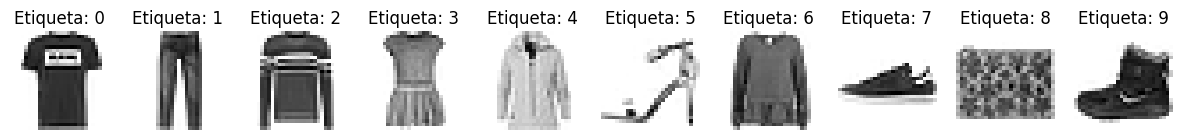

In [13]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for ax, image, label in zip(axes, X_u, y_u):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Etiqueta: %i' % label)

# **Selección del Modelo de Random Forest**
Se escogio el modelo de clasificación Random Forest dada su simplicidad, explicabilidad y efectividad que tenemos en el caso de uso. Aquí se importa el modelo y se configuran los hiperparámetros: profundidad, aleatoriedad y procesamiento, para hacer el primer entrenamiento.

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5, random_state=0, n_jobs=5)

# Reshape the training and testing data to be 2-dimensional
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

rf_model.fit(X_train_flat,y_train)

RandomForestClassifier(max_depth=5, n_jobs=5, random_state=0)

# **Importancia de las Variables**
Mediante visualización en heatmap y colormap idetificareos la importancia de las variables, cuales pixeles son determinantes en la clasificación de las imágenes.

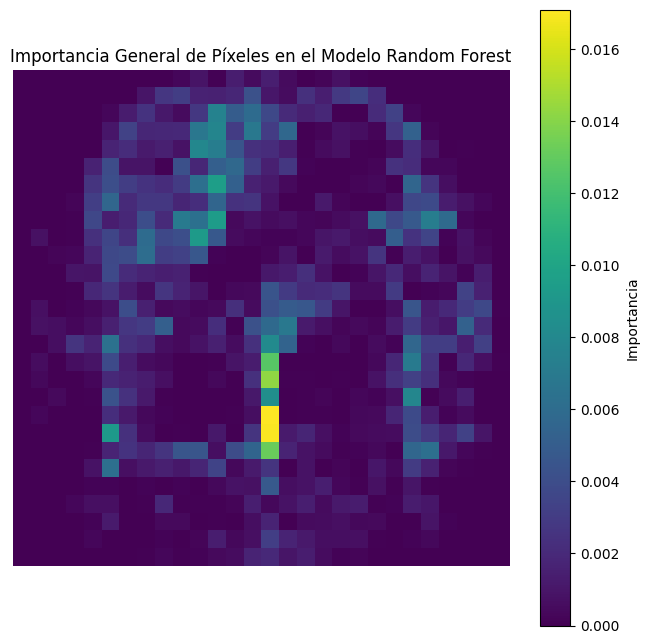


Visualizing average pixel values per class:


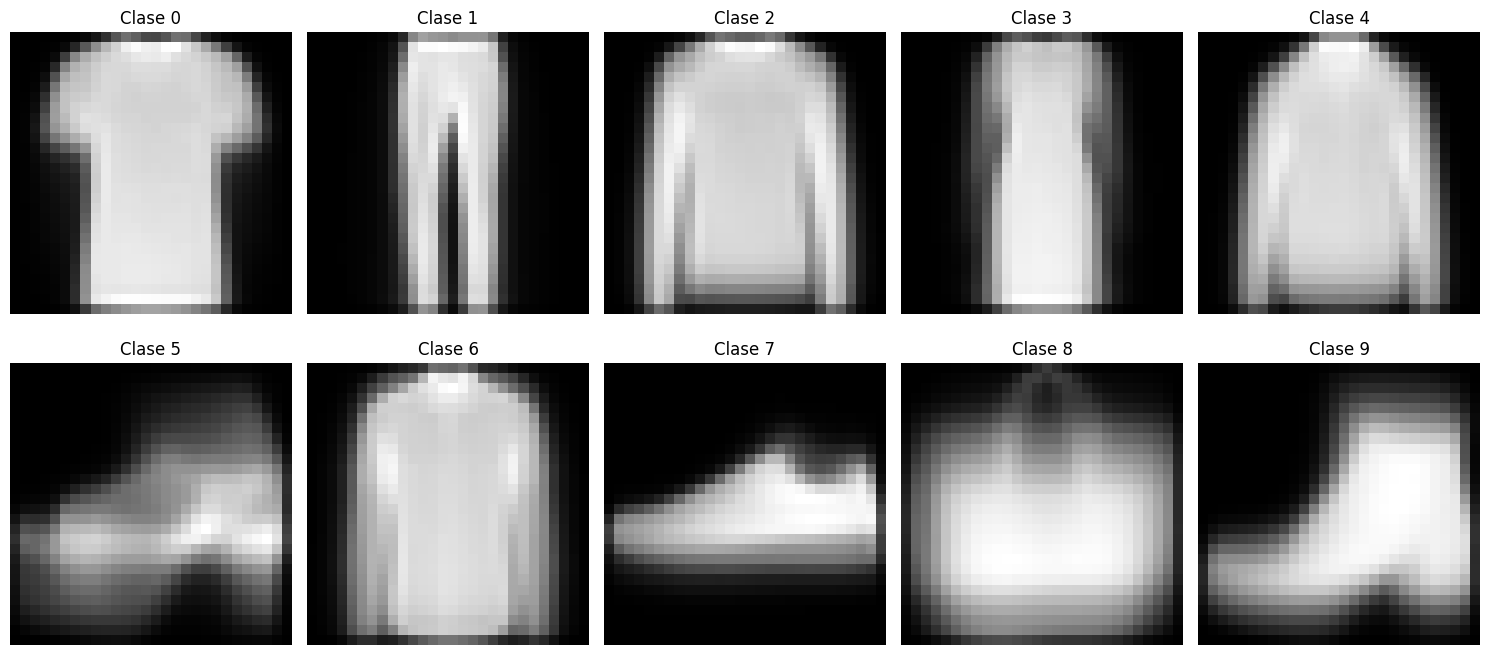

In [36]:
# Get feature importances from the trained Random Forest model
# Ensure rf_model_15 is defined by running the preceding cells
try:
    feature_importances = rf_model.feature_importances_

    # Reshape the feature importances back to the original image shape (28x28)
    feature_importances_image = feature_importances.reshape(28, 28)

    # Visualize the overall feature importances as an image
    plt.figure(figsize=(8, 8))
    plt.imshow(feature_importances_image, cmap=plt.cm.viridis, interpolation='nearest')
    plt.title('Importancia General de Píxeles en el Modelo Random Forest')
    plt.colorbar(label='Importancia')
    plt.axis('off')
    plt.show()

except NameError:
    print("Error: rf_model_15 is not defined. Please run the model training cells first.")
except AttributeError:
    print("Error: Could not get feature importances. Ensure rf_model_15 is a trained RandomForestClassifier.")

# --- Add code to visualize average pixel values per class ---

print("\nVisualizing average pixel values per class:")

# Reshape X_train back to the original image shape for easier processing
X_train_images = X_train.reshape(X_train.shape[0], 28, 28)

# Get unique classes and their labels
unique_classes, class_labels = np.unique(y_train, return_index=True)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.flatten() # Flatten the 2x5 array of axes into a 1D array

# Iterate through each class and plot the average image
for i, class_id in enumerate(unique_classes):
    # Select images belonging to the current class
    class_images = X_train_images[y_train == class_id]

    # Calculate the average pixel value for each pixel across all images in the class
    average_image = np.mean(class_images, axis=0)

    # Display the average image as a heatmap
    ax = axes[i]
    ax.imshow(average_image, cmap=plt.cm.gray) # Using gray colormap for average pixel values
    ax.set_title(f'Clase {class_id}')
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# **Evaluación del Modelo**
Revisión de parametros de rendimiento del modelo de clasificación Random Forest

In [ ]:
pred_train = rf_model.predict(X_train_flat)
pred_test = rf_model.predict(X_test_flat)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train_flat, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test_flat, y_test)))

Precisión sobre los datos de entrenamiento: 77.41
Precisión sobre los datos de test: 76.29


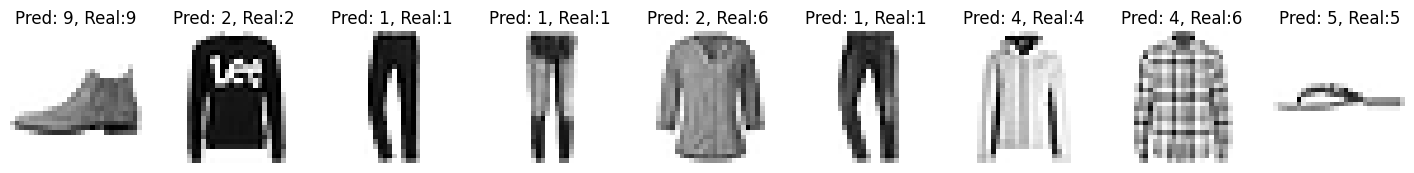

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, X_test, pred_test, y_test):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

In [ ]:
from sklearn import metrics

In [ ]:
print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, pred_test)}\n")

Classification report for classifier RandomForestClassifier(max_depth=5, n_jobs=5, random_state=0):
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.99      0.85      0.92      1000
           2       0.58      0.71      0.63      1000
           3       0.64      0.88      0.74      1000
           4       0.53      0.74      0.62      1000
           5       0.97      0.84      0.90      1000
           6       0.68      0.08      0.14      1000
           7       0.85      0.90      0.87      1000
           8       0.92      0.92      0.92      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.74     10000
weighted avg       0.78      0.76      0.74     10000




Confusion matrix:



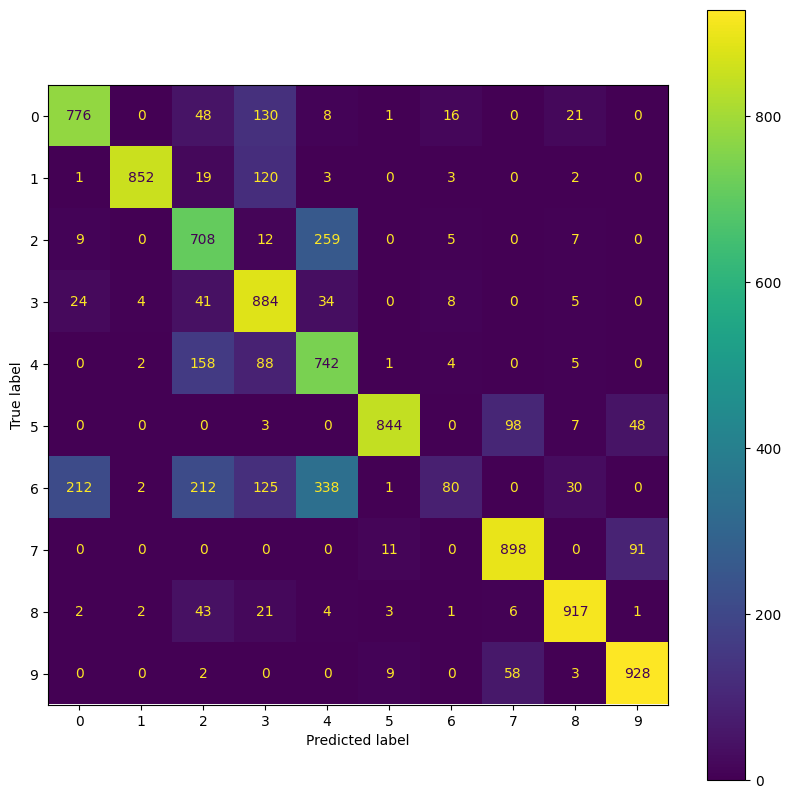

In [ ]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(rf_model, X_test_flat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

# **Optimización del modelo (Re-entrenamiento)**
Dada la evaluación inicial realizada se hace ajuste de hiperparámetros para maximizar el performance del modelo

In [37]:
md_list = []
score_train_list = []
score_test_list = []

# Reshape the training and testing data to be 2-dimensional outside the loop
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


for maxdepth in list(range(1,30,4)):
  rf_model = RandomForestClassifier(random_state=0, max_depth=maxdepth, n_jobs=10, n_estimators=120 )
  # Fit the model using the flattened training data
  rf_model.fit(X_train_flat, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  # Score the model using the flattened data
  score_train_list.append(100.0*rf_model.score(X_train_flat, y_train))
  score_test_list.append(100.0*rf_model.score(X_test_flat, y_test))

In [ ]:
print(rf_model.n_estimators)

120


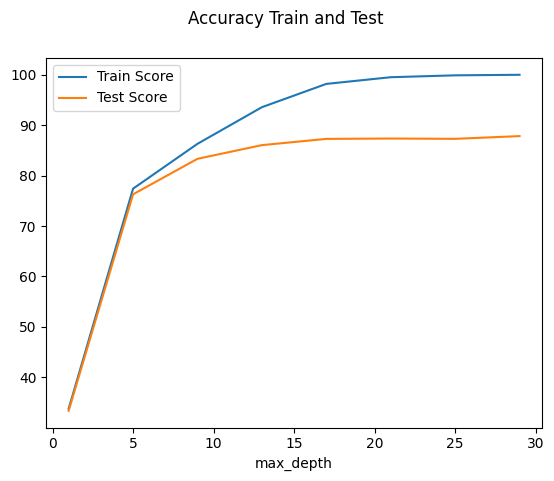

In [ ]:
df = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();

In [ ]:
rf_model_15 = RandomForestClassifier(max_depth=13, random_state=0, n_jobs=10, n_estimators=120)
rf_model_15.fit(X_train_flat,y_train)

RandomForestClassifier(max_depth=13, n_estimators=120, n_jobs=10,
                       random_state=0)

In [ ]:
pred_train = rf_model_15.predict(X_train_flat)
pred_test = rf_model_15.predict(X_test_flat)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model_15.score(X_train_flat, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model_15.score(X_test_flat, y_test)))

Precisión sobre los datos de entrenamiento: 93.55
Precisión sobre los datos de test: 86.03


Confusion matrix:



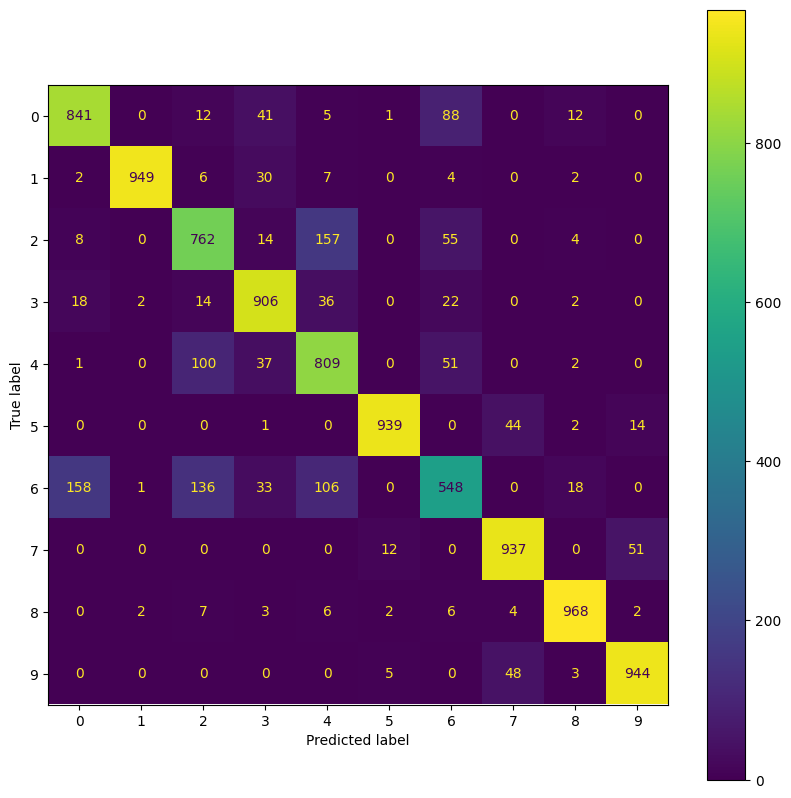

In [ ]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(rf_model_15, X_test_flat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

In [ ]:
true_positives_4 = 850
false_positives_4 = 237
false_negatives_4 = 147

Recall = 100.0*true_positives_4/(false_negatives_4+true_positives_4)
Precision = 100.0*true_positives_4/(false_positives_4+true_positives_4)

print (round(Precision,2), round(Recall,2))

78.2 85.26


In [ ]:
#sdefrgc 56482

In [ ]:
print(f"Classification report for classifier {rf_model_15}:\n"
      f"{metrics.classification_report(y_test, pred_test)}\n")

Classification report for classifier RandomForestClassifier(max_depth=13, n_estimators=120, n_jobs=10,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.73      0.76      0.75      1000
           3       0.85      0.91      0.88      1000
           4       0.72      0.81      0.76      1000
           5       0.98      0.94      0.96      1000
           6       0.71      0.55      0.62      1000
           7       0.91      0.94      0.92      1000
           8       0.96      0.97      0.96      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


